# Assignment: Numpy and Matplotlib
- The goal of this assignment is to gain comfort creating, visualizating, and computing with numpy array. By the end of the assignment, you should feel comfortable:

# 1) Creating and Manipulating Arrays
First import numpy and matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1.1. Create two 2D arrays representing coordinates x, y on the cartesian plan
Both should cover the range (-2, 2) and have 100 points in each direction

In [2]:
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
xx, yy = np.meshgrid(x, y)
xx.shape, yy.shape

((100, 100), (100, 100))

## 1.2. Visualize each 2D array using pcolormesh
Use the correct coordiantes for the x and y axes.

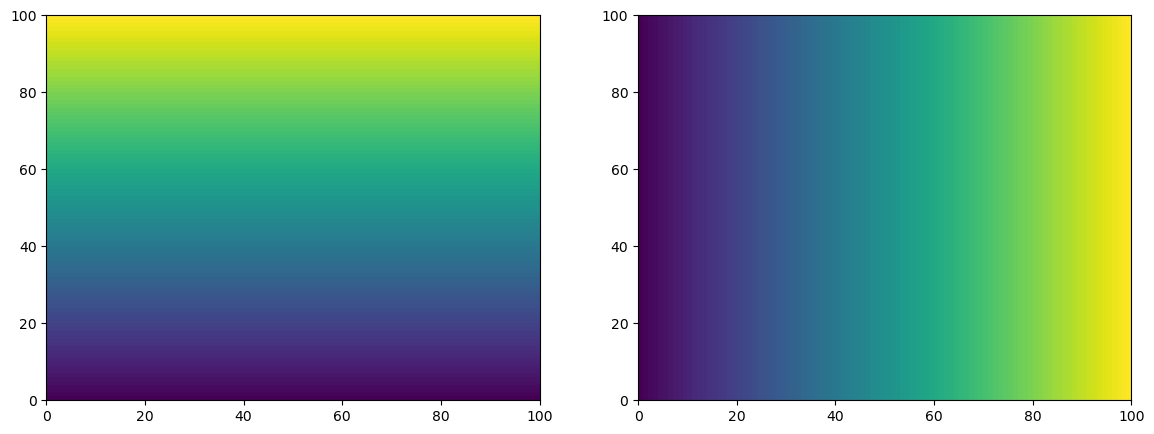

In [12]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.pcolormesh(yy)
plt.subplot(1, 2, 2)
plt.pcolormesh(xx)

## 1.3 From your cartesian coordinates, create polar coordinates  $r$ and $\phi$ 


In [14]:
r = np.sqrt(xx**2, yy**2)
t = np.arctan2(xx, yy)
r, t

(array([[2.        , 1.95959596, 1.91919192, ..., 1.91919192, 1.95959596,
         2.        ],
        [2.        , 1.95959596, 1.91919192, ..., 1.91919192, 1.95959596,
         2.        ],
        [2.        , 1.95959596, 1.91919192, ..., 1.91919192, 1.95959596,
         2.        ],
        ...,
        [2.        , 1.95959596, 1.91919192, ..., 1.91919192, 1.95959596,
         2.        ],
        [2.        , 1.95959596, 1.91919192, ..., 1.91919192, 1.95959596,
         2.        ],
        [2.        , 1.95959596, 1.91919192, ..., 1.91919192, 1.95959596,
         2.        ]]),
 array([[-2.35619449, -2.36639822, -2.37681013, ...,  2.37681013,
          2.36639822,  2.35619449],
        [-2.34599076, -2.35619449, -2.36661078, ...,  2.36661078,
          2.35619449,  2.34599076],
        [-2.33557885, -2.3457782 , -2.35619449, ...,  2.35619449,
          2.3457782 ,  2.33557885],
        ...,
        [-0.8060138 , -0.79581445, -0.78539816, ...,  0.78539816,
          0.79581445,  0

## 1.4. Visualize and on the 2D $x$/$y$ plane using pcolormesh

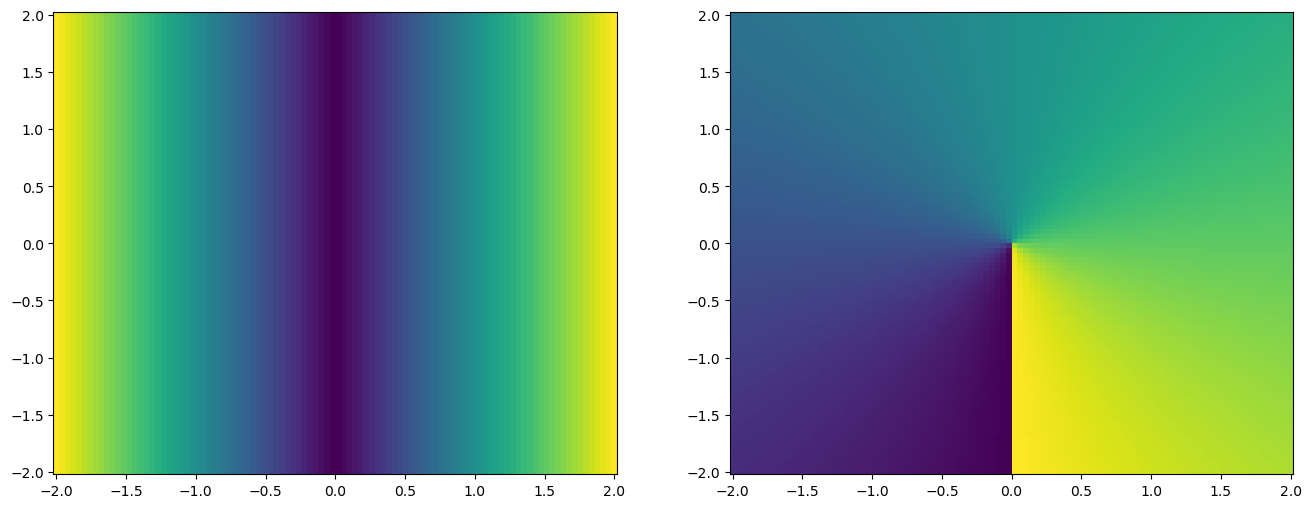

In [25]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.pcolormesh(xx, yy, r, shading="auto")
plt.subplot(1, 2, 2)
plt.pcolormesh(xx, yy, t, shading="auto")

## 1.5 Caclulate the $f=cos^2(4r) + sin^2(4\phi)$ quanity And plot it on the $xy$ plane

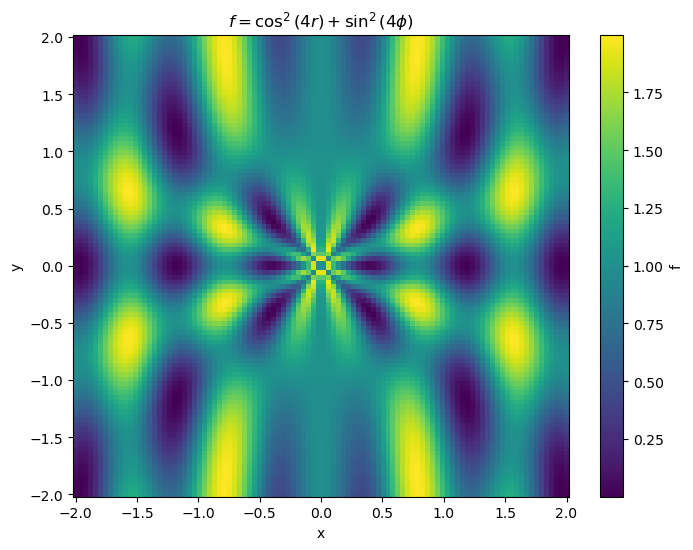

In [19]:
# Plot the result
plt.figure(figsize=(8, 6))
plt.pcolormesh(xx, yy, f, shading="auto")
plt.colorbar(label="f")
plt.xlabel("x")
plt.ylabel("y")
plt.title(r"$f = \cos^2(4r) + \sin^2(4\phi)$")
plt.show()

## 1.6 Plot the mean of f with respect to the x axis as a function of y

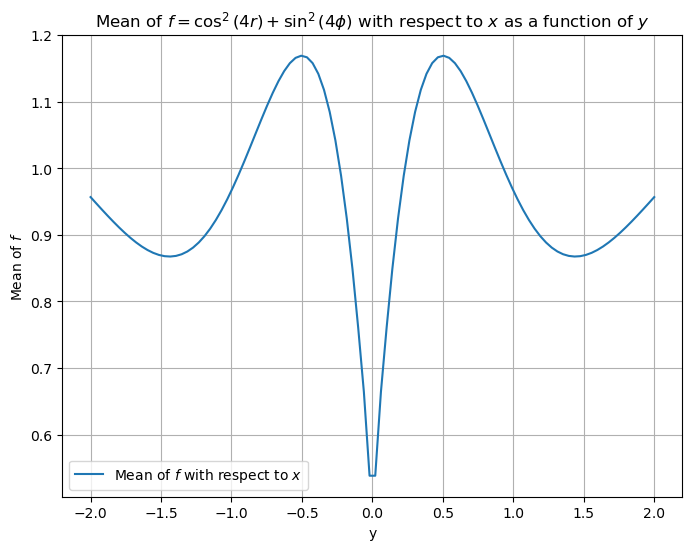

In [42]:
# Calcular a média de f com  respeito ao eixo x,para cada valor de y
f_mean_x = np.mean(f, axis=1)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(y, f_mean_x, label=r"Mean of $f$ with respect to $x$")
plt.xlabel("y")
plt.ylabel("Mean of $f$")
plt.title(
    r"Mean of $f=\cos^2(4r) + \sin^2(4\phi)$ with respect to $x$ as a function of $y$"
)
plt.grid(True)
plt.legend()
plt.show()

## 1.7 Plot the mean of f with respect to the y axis

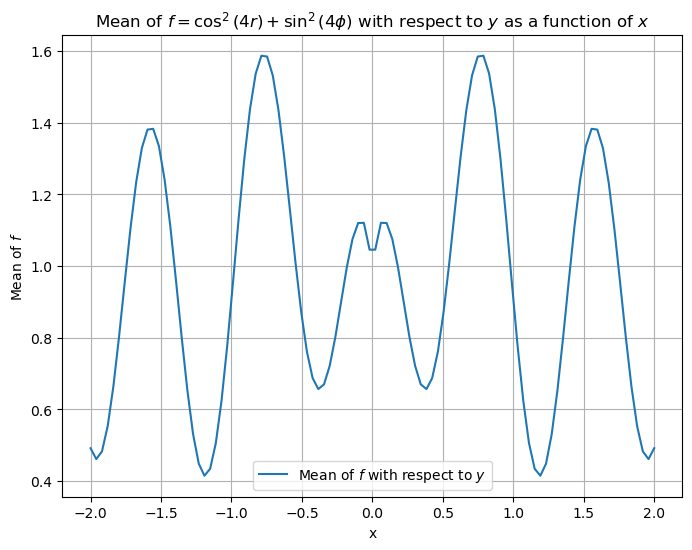

In [40]:
f_mean_y = np.mean(f, axis=0)

# Plotar
plt.figure(figsize=(8, 6))
plt.plot(x, f_mean_y, label=r"Mean of $f$ with respect to $y$")
plt.xlabel("x")
plt.ylabel("Mean of $f$")
plt.title(
    r"Mean of $f = \cos^2(4r) + \sin^2(4\phi)$ with respect to $y$ as a function of $x$"
)
plt.legend()
plt.grid(True)
plt.show()

## 1.8 Plot the mean of $f$ with respect to $\phi$ as a function of $r$


In [49]:
r_bins = np.linspace(0, np.max(r), 100)

In [50]:
r_discrete = np.digitize(r, r_bins)

array([[100,  97,  95, ...,  96,  98, 100],
       [100,  97,  95, ...,  96,  98, 100],
       [100,  97,  95, ...,  96,  98, 100],
       ...,
       [100,  97,  95, ...,  96,  98, 100],
       [100,  97,  95, ...,  96,  98, 100],
       [100,  97,  95, ...,  96,  98, 100]], dtype=int64)

# Part 2: Analyze ARGO Data

Let’s start by using pooch to download the data files we need for this exercise. The following code will give you a list of .npy files that you can open in the next step.

In [55]:
import pooch

url = "https://www.ldeo.columbia.edu/~rpa/float_data_4901412.zip"
files = pooch.retrieve(
    url=url,
    processor=pooch.Unzip(),
    known_hash="2a703c720302c682f1662181d329c9f22f9f10e1539dc2d6082160a469165009",
)
files

['C:\\Users\\Gabriel\\AppData\\Local\\pooch\\pooch\\Cache\\7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip\\float_data\\date.npy',
 'C:\\Users\\Gabriel\\AppData\\Local\\pooch\\pooch\\Cache\\7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip\\float_data\\lat.npy',
 'C:\\Users\\Gabriel\\AppData\\Local\\pooch\\pooch\\Cache\\7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip\\float_data\\levels.npy',
 'C:\\Users\\Gabriel\\AppData\\Local\\pooch\\pooch\\Cache\\7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip\\float_data\\lon.npy',
 'C:\\Users\\Gabriel\\AppData\\Local\\pooch\\pooch\\Cache\\7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip\\float_data\\P.npy',
 'C:\\Users\\Gabriel\\AppData\\Local\\pooch\\pooch\\Cache\\7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip\\float_data\\S.npy',
 'C:\\Users\\Gabriel\\AppData\\Local\\pooch\\pooch\\Cache\\7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip\\float_data\\T.

## 2.1 Load each data file as a numpy array.
You can use whatever names you want for your arrays, but I recommend

T: temperature

S: salinity

P: pressure

date: date

lat: latitude

lon: longitude

level: depth level

Note: you have to actually look at the file name (the items in files) to know which files corresponds to which variable.

In [56]:
T = np.load(files[-1])
S = np.load(files[-2])
P = np.load(files[4])
date = np.load(files[0])
lat = np.load(files[1])
lon = np.load(files[3])
levels = np.load(files[2])

## 2.2 Examine the shapes of T, S and P compared to lon, lat, date and level. How do you think they are related?
Based on the shapes, which dimensions do you think are shared among the arrays?

In [59]:
T.shape, S.shape, P.shape

((78, 75), (78, 75), (78, 75))

In [60]:
lon.shape, lat.shape, date.shape, levels.shape

((75,), (75,), (75,), (78,))

The T, S and P variables have two dimensions, formed by 78 rows and 75 columns. The rows correspond to the levels, and the columns to the coordinates and time.

## 2.3 Make a plot for each column of data in T, S and P (three plots).
The vertical scale should be the levels data. Each plot should have a line for each column of data. It will look messy.

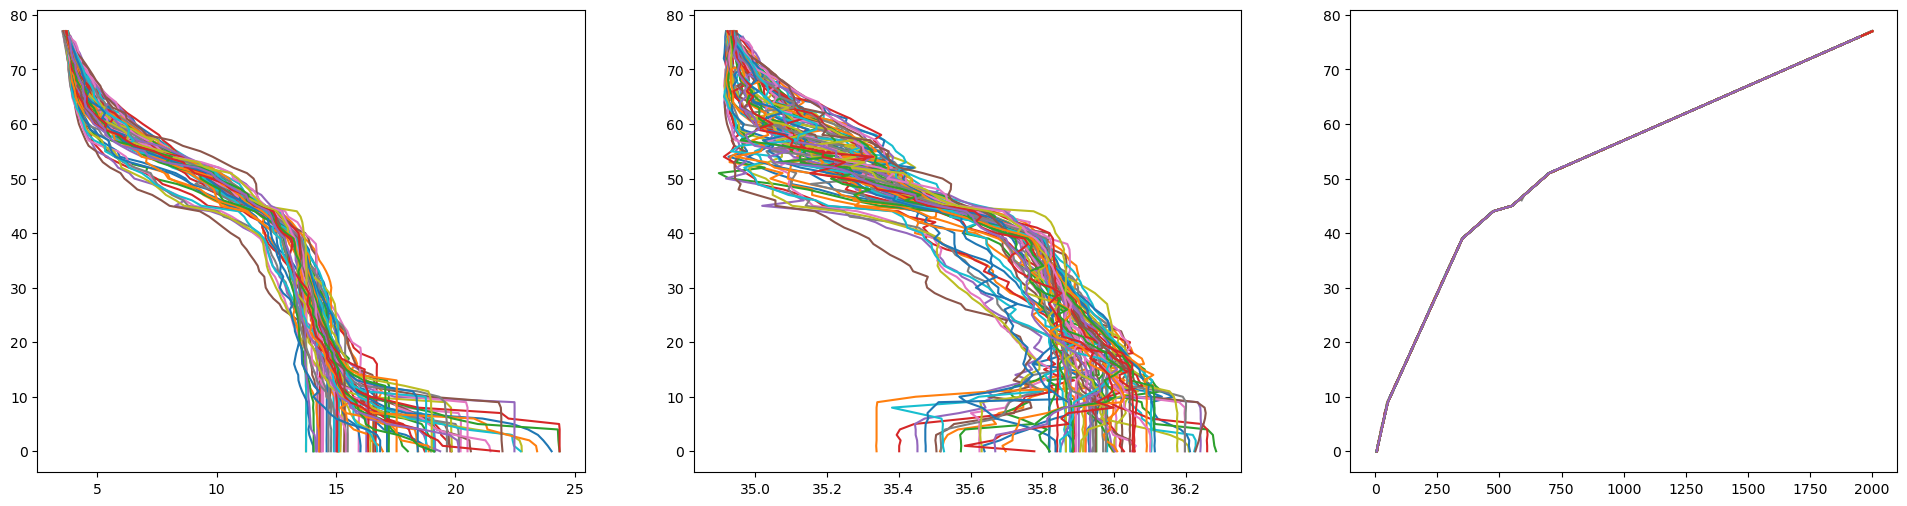

In [79]:
# Plot for temperature
plt.figure(figsize=(24, 6))
plt.subplot(1, 3, 1)
plt.plot(T, levels)
plt.subplot(1, 3, 2)
plt.plot(S, levels)
plt.subplot(1, 3, 3)
plt.plot(P, levels)
plt.show()

## 2.4 Compute the mean and standard deviation of each of T, S and P at each depth in level.

In [107]:
T_mean = np.mean(T, axis=1)
T_std = np.std(T, axis=1)
S_mean = np.mean(S, axis=1)
S_std = np.std(S, axis=1)
P_mean = np.mean(P, axis=1)
P_std = np.std(P, axis=1)

## 2.5 Now make three similar plot, but show only the mean T, S and P at each depth. Show error bars on each plot using the standard deviations.

Text(0, 0.5, 'Levels')

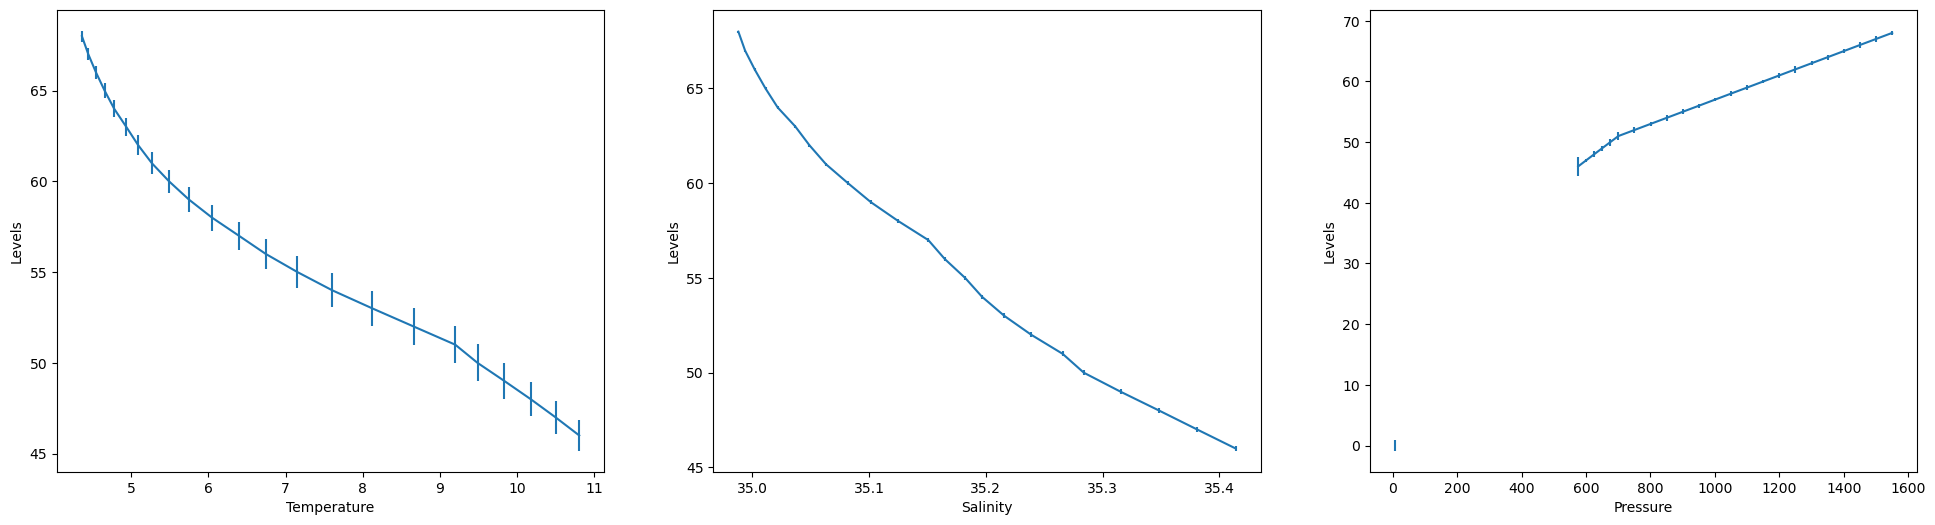

In [108]:
# plt.plot(T_mean, levels)

plt.figure(figsize=(24, 6))
plt.subplot(1, 3, 1)
plt.errorbar(T_mean, levels, T_std)
plt.xlabel("Temperature")
plt.ylabel("Levels")
plt.subplot(1, 3, 2)
plt.errorbar(S_mean, levels, S_std)
plt.xlabel("Salinity")
plt.ylabel("Levels")
plt.subplot(1, 3, 3)
plt.errorbar(P_mean, levels, P_std)
plt.xlabel("Pressure")
plt.ylabel("Levels")

## 2.6 Account For Missing Data

In [111]:
T_mean = np.nanmean(T, axis=1)
T_std = np.nanstd(T, axis=1)
S_mean = np.nanmean(S, axis=1)
S_std = np.nanstd(S, axis=1)
P_mean = np.nanmean(P, axis=1)
P_std = np.nanstd(P, axis=1)

Text(0, 0.5, 'Levels')

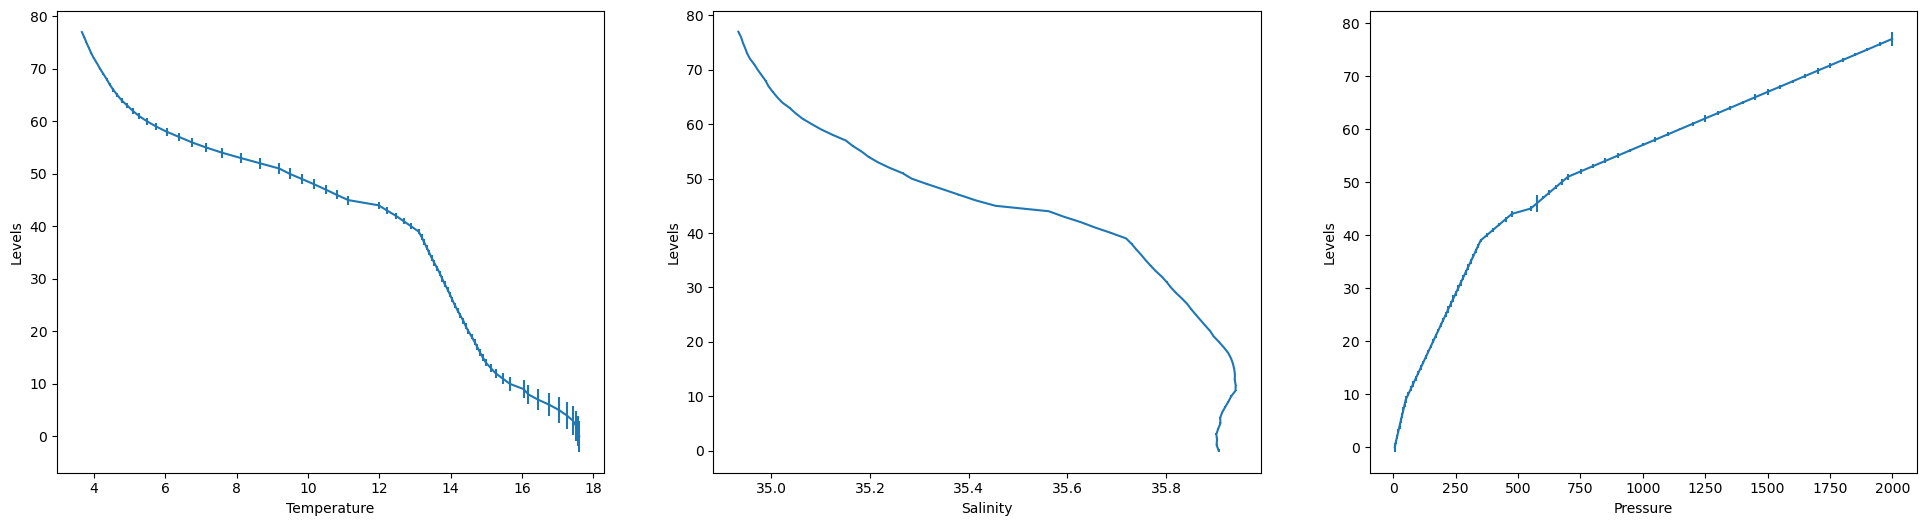

In [112]:
# plt.plot(T_mean, levels)

plt.figure(figsize=(24, 6))
plt.subplot(1, 3, 1)
plt.errorbar(T_mean, levels, T_std)
plt.xlabel("Temperature")
plt.ylabel("Levels")
plt.subplot(1, 3, 2)
plt.errorbar(S_mean, levels, S_std)
plt.xlabel("Salinity")
plt.ylabel("Levels")
plt.subplot(1, 3, 3)
plt.errorbar(P_mean, levels, P_std)
plt.xlabel("Pressure")
plt.ylabel("Levels")

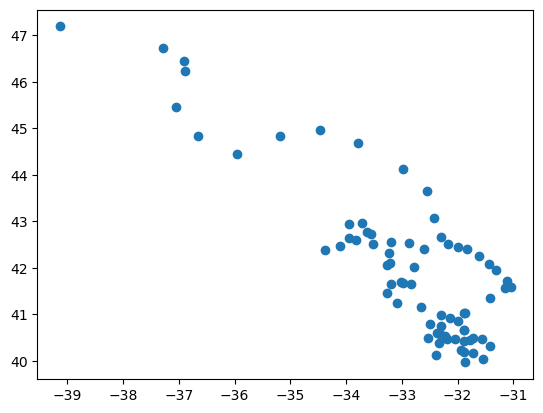

In [110]:
plt.scatter(lon, lat)